# Clasificador K-Nearest Neighbors

Se crea un clasificador de k vecinos mas cercanos

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets

In [32]:
input_file = 'data.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1].astype(np.int)

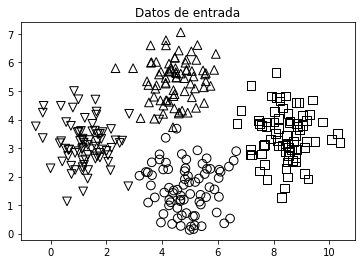

In [33]:
#Grafica de datos
plt.figure()
plt.title('Datos de entrada')
marker_shapes = 'v^os'
mapper= [marker_shapes[i] for i in y]
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1],marker=mapper[i],s=75, edgecolors='black', facecolors='none')

In [34]:
#Numero de vecinos mas cercanos
num_neighbors = 12
#Definir el tamaño de paso de la cuadricula que se usara para visualizar los limites del clasificador
step_size = 0.01

#Clasificador k Nearest Neighbors
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance')

classifier.fit(X, y)

#Cuadricula de valores que se usaran para visualizar los limites
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
x_values, y_values = np.meshgrid(np.arange(x_min,x_max,step_size), np.arange(y_min, y_max, step_size))
#Evaluar el clasificador con los valores de la cuadricula
output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])


Text(0.5, 1.0, 'Limites de clasificación de vecinos mas cercanos')

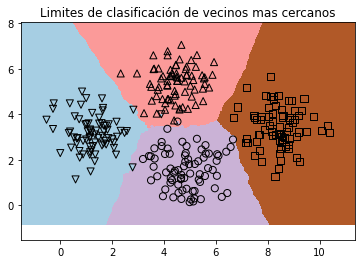

In [35]:
#Crear una malla de color para visualizar la salida
output = output.reshape(x_values.shape)
plt.figure()
plt.pcolormesh(x_values, y_values, output, cmap=cm.Paired)
#Superponer los datos de entrenamiento 
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i],s=50,edgecolors='black',facecolors='none')
    
plt.xlim(x_values.min(), x_values.max())
plt.ylim(x_values.min(), y_values.max())
plt.title("Limites de clasificación de vecinos mas cercanos")

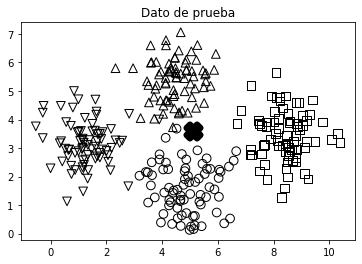

In [36]:
#Definimos un punto de prueba , lo graficamos para ver donde esta ubicado 
#lo graficamos junto a los datos de entrenamiento

test_datapoint = [5.1, 3.6]
plt.figure()
plt.title('Dato de prueba')
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i],s=75,edgecolors='black' ,facecolors='none')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='X',linewidth=6,s=200,facecolors='black')    

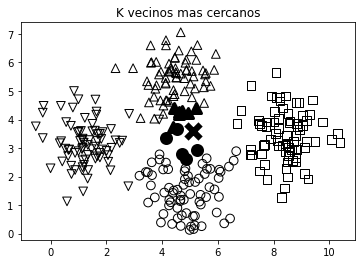

In [37]:
#Extraer los vecinos mas cercanos
_, indices = classifier.kneighbors([test_datapoint])
indices = indices.astype(np.int)[0]

#Graficar vecinos mas cercanos
plt.figure()
plt.title('K vecinos mas cercanos')
for i in indices:
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[y[i]],linewidth=3,s=100, facecolors='black')

plt.scatter(test_datapoint[0],test_datapoint[1],marker='x',linewidth=6,s=200,facecolors='black')

for i in range(X.shape[0]):
    plt.scatter(X[i, 0],X[i, 1],marker=mapper[i],s=75,edgecolors='black',facecolors='none')
 


In [38]:
print("Predicción:",classifier.predict([test_datapoint])[0])

Predicción: 1
